## Performing customer segmentation 

### Import the customers.csv

The dataset is obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#### Import the data and remove categorical variable

In [2]:
data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


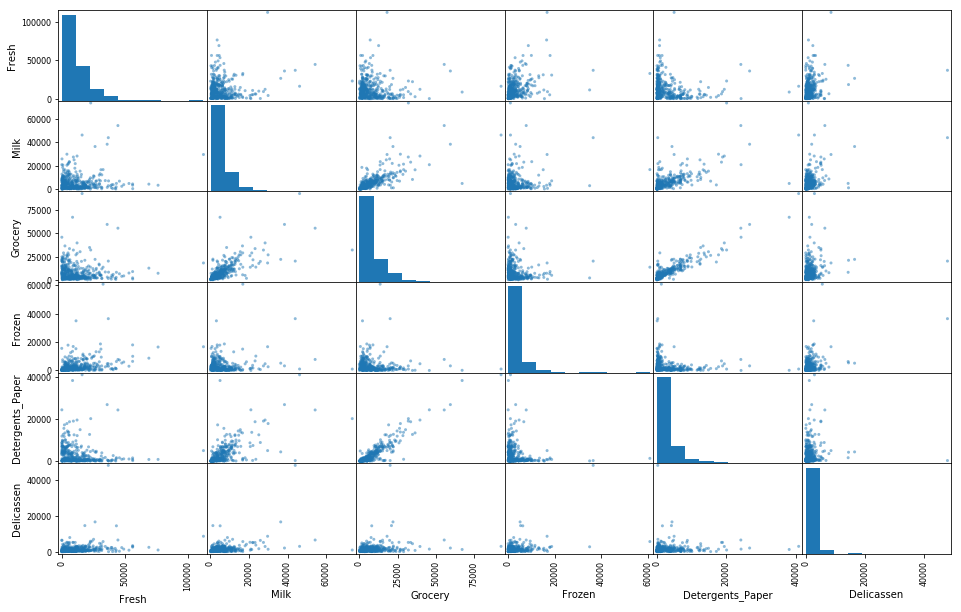

In [4]:
# Scatter plot of all the features 
pd.plotting.scatter_matrix(data, figsize = (16,10))
plt.show()

#### Since the data is skewed we perform a log transform

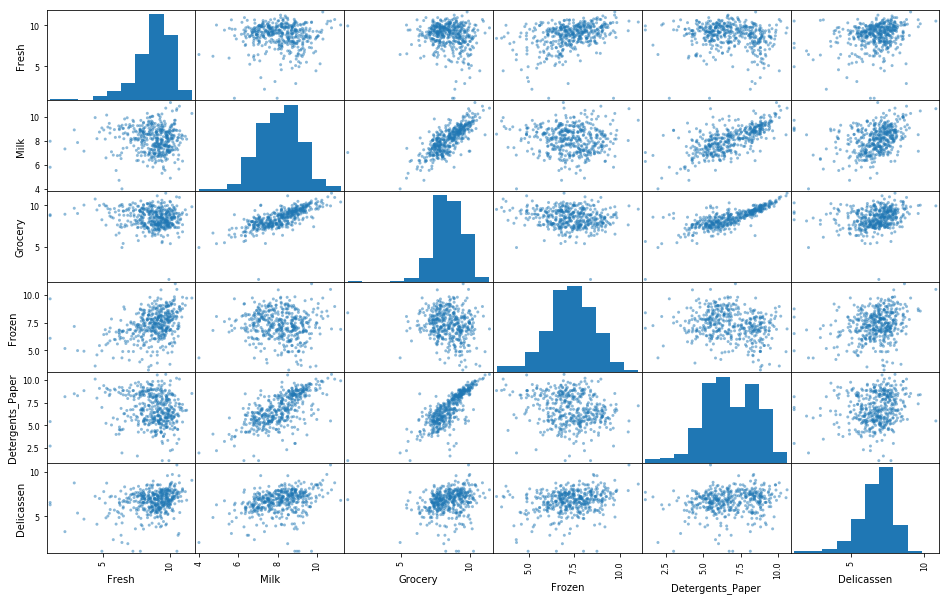

In [5]:
# We transform the data using the natural logarithm
data_trans = data.apply(lambda x: np.log(x))

# Scatter plot matrix for each pair of transformed features
pd.plotting.scatter_matrix(data_trans, figsize = (16,10));
plt.show()

#### We put the data into a numpy array to use in kmeans 

In [6]:
X = data_trans.values

### Elbow curve 

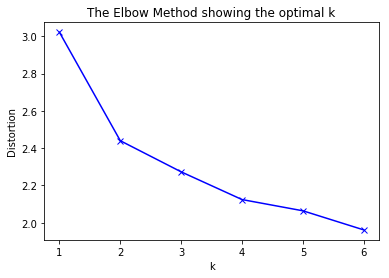

In [7]:
# k means determine k
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #distortion.append(clusters.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Based on the graph we can choose k=2 or k=4 

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

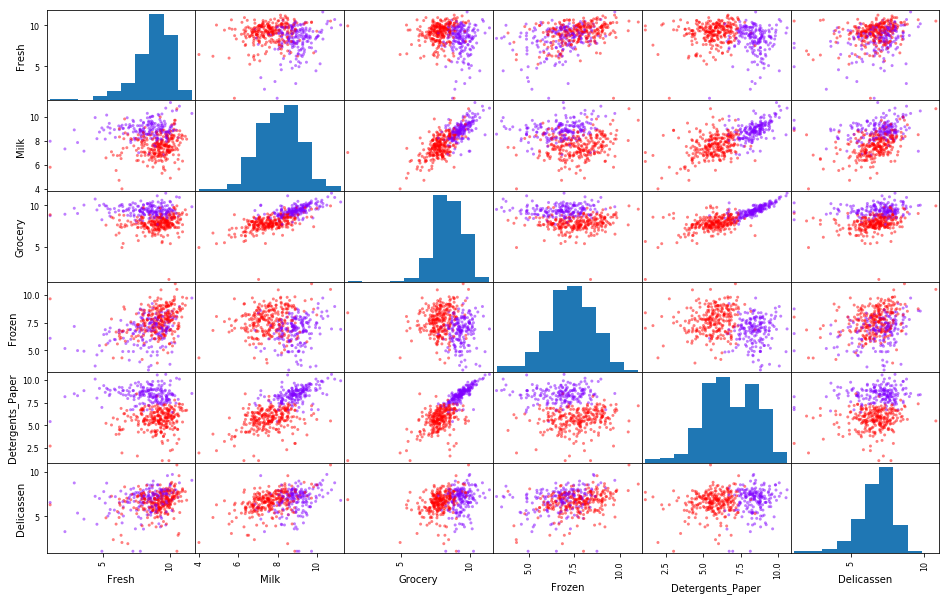

In [9]:
# Scatter plot matrix for each pair of transformed features along the the cluster centers
pd.plotting.scatter_matrix(data_trans, figsize = (16,10),c=kmeans.labels_, cmap='rainbow');
plt.show()

#### Reporting values of the cluster centers

In [10]:
centers=kmeans.cluster_centers_
centers = np.exp(kmeans.cluster_centers_)
centers = pd.DataFrame(centers, columns = data.keys())
centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3868.721669,7487.802001,11905.075822,854.253907,4591.607846,913.918927
1,8621.366983,1913.554173,2381.683277,2186.819880,277.225348,704.493266
